# NMF

In [69]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [121]:
#construct a low rank matrix
Wtrue = np.random.rand(40,5)
Htrue = np.random.rand(5,10)
V0 = Wtrue @ Htrue
V0.shape

(40, 10)

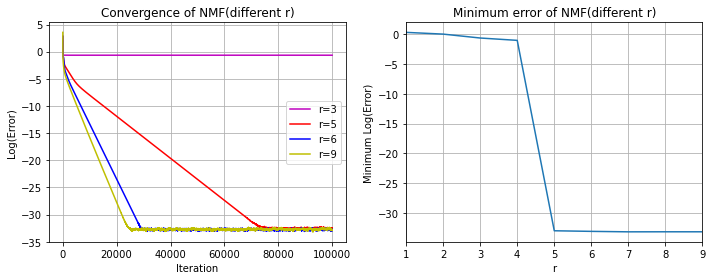

In [123]:
# dimension of data
m,n = V0.shape


# normalises columnwise
V = np.zeros((m,n))
for i in range(n):
    V[:,i] = V0[:,i]/np.max(V0[:,i])

    
color = 0
min_errors = []
#Spcify different ranks

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

for r in range(1,10):
    #initialize 
    W = np.random.rand(m,r)
    H = np.random.rand(r,n)

    MaxIter = 100000
    f = np.zeros((MaxIter,1))


    #Initial error 
    f[0] = np.linalg.norm(V - W@H, ord="fro")

    # print(V.shape,W.shape,H.shape)
#     print(np.linalg.norm(V - W@H))

    for iter in range(MaxIter -1):
        # update w 
        W = W*(V@H.T)/(W@H@H.T)
        #update h
        H = H *(W.T@V)/(W.T @ W @H)
        f[iter+1] = np.linalg.norm(V- W @H , ord="fro")

    # W.shape
    
    if r in [3,5,6,9]:
        ax[0].plot(np.arange(MaxIter),np.log(f),c=["m","r","b","y"][color],label="r={}".format(r))
        ax[0].legend()
        color += 1
    min_errors.append(np.log(min(f)))
    
ax[0].grid(True)
ax[0].set_title("Convergence of NMF(different r)")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Log(Error)")
ax[1].grid(True)
ax[1].set_title("Minimum error of NMF(different r)")
ax[1].set_xlabel("r")
ax[1].set_ylabel("Minimum Log(Error)")
ax[1].set_xlim(1,9)
ax[1] = plt.plot(range(1,10),min_errors)
plt.tight_layout()

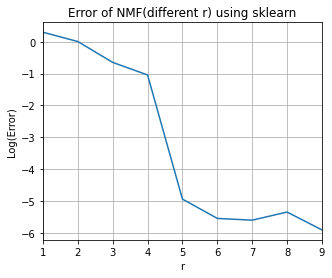

In [124]:
# compare results with sklearn package
from sklearn.decomposition import NMF

min_errors_sk = []
for r in range(1,10):
    nmf_model = NMF(n_components=r, init='random',max_iter=10000)
    W = nmf_model.fit_transform(V)
    H = nmf_model.components_
    f = np.linalg.norm(V - W@H)
    min_errors_sk.append(np.log(f))
 

fig, ax = plt.subplots(figsize=(5,4))
ax.set_title("Error of NMF(different r) using sklearn")
ax.set_xlabel("r")
ax.set_ylabel("Log(Error)")
ax.set_xlim(1,9)
ax.grid(True)
ax = plt.plot(range(1,10),min_errors_sk)


In [195]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [225]:
# loading data 
stocks = pd.read_excel("Equities.xlsx", verbose=False).dropna()
colnames = stocks.columns
FTSE_index = stocks[colnames[1]].to_numpy()

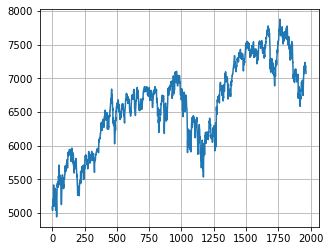

In [226]:
#FTSE inex data display
fig, ax = plt.subplots(figsize=(5,4))
ax.grid(True)
ax = plt.plot(FTSE_index)


In [227]:
V0 = stocks[colnames[2:len(colnames)]].to_numpy()
V0.shape

(1966, 95)

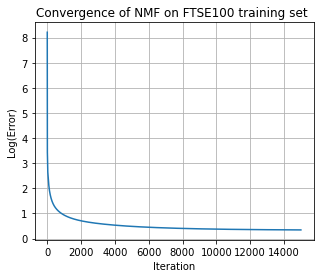

In [242]:
# normalises columnwise
V = np.zeros(V0.shape)

V_train = V[:len(V)//2]
V_test = V[len(V)//2:]

m, n = V_train.shape
for i in range(n):
    V[:,i] = V0[:,i]/np.max(V0[:,i])

V_train = V[:len(V)//2]
V_test = V[len(V)//2:]
    
r = 50

#initialize 
W = np.random.rand(m,r)
H = np.random.rand(r,n)

MaxIter = 15000
f_train = np.zeros((MaxIter,1))
f_test = np.zeros((MaxIter,1))


#Initial error 
f_train[0] = np.linalg.norm(V_train - W@H, ord="fro")
f_test[0] = np.linalg.norm(V_test - W@H, ord="fro")


for iter in range(MaxIter -1):
    # update w 
    W = W*(V_train@H.T)/(W@H@H.T)
    #update h
    H = H *(W.T@V_train)/(W.T @ W @H)
    f_train[iter+1] = np.linalg.norm(V_train- W @H , ord="fro")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax.set_xlabel("Iteration")
ax.set_ylabel("Log(Error)")
ax.grid(True)
ax.set_title("Convergence of NMF on FTSE100 training set ")
ax.plot(np.arange(MaxIter),np.log(f_train))


In [248]:
# FTSE_train = FTSE_index[:len(FTSE_index)//2]
# FTSE_test = FTSE_index[len(FTSE_index)//2:]
# max_cor = 0
# max_cor_index = 0

# # find most correlated factors in W
# for i in range(r):
#     factor = W[:,i]   
#     cor = np.corrcoef(FTSE_train,factor)[0][1]
#     if cor > max_cor:
#         max_cor = cor
#         max_cor_index = i
# #     print(cor)

    
# import heapq

# # find corresponding H
# H_select = H[max_cor_index]/np.sum(H[max_cor_index])
# H_select = list(H_select)

# # get index of largest 10 weights
# index_10 = list(map(H_select.index, heapq.nlargest(10, H_select))) 
# weight_10 = heapq.nlargest(10, H_select) #get largest 10 weights
# # print(index_10) 
# # print(weight_10) 
# weight_10 = weight_10/sum(weight_10)

# # get the FTSE return ratio
# FTSE_return_train = (FTSE_train - FTSE_train[0])/FTSE_train[0]
# FTSE_return_test = (FTSE_test - FTSE_test[0])/FTSE_test[0]

# # get the stocks we selected from data
# Stocks_selected_test =  V_test[:,list(index_10)]
# Stocks_selected_train =  V_train[:,list(index_10)]


In [258]:
from sklearn.linear_model import Lasso
FTSE_train = FTSE_index[:len(FTSE_index)//2]
FTSE_test = FTSE_index[len(FTSE_index)//2:]


max_cor = 0
max_cor_index = 0

# find most correlated factors in W
for i in range(r):
    factor = W[:,i]   
    cor = np.corrcoef(FTSE_train,factor)[0][1]
    if cor > max_cor:
        max_cor = cor
        max_cor_index = i
        
ll = Lasso(alpha=0.00001,max_iter = 100000)
ll.fit(V_train,W[:,max_cor_index])
wl = ll.coef_
# get top 10 weights 
num = np.unique(wl)[-10]
wl[wl<num] = 0

wl = wl/np.sum(wl)

FTSE_return_train = (FTSE_train - FTSE_train[0])/FTSE_train[0]
FTSE_return_test = (FTSE_test - FTSE_test[0])/FTSE_test[0]

# get the stocks we selected from data
Stocks_selected_test =  V_test
Stocks_selected_train =  V_train

select_return_train = []
select_return_test = []

total_return_train = []
total_return_test = []

# compute return ratio in our selected stocks(both in training and test data)
for stocks in Stocks_selected_train:
    c_return = np.true_divide(stocks - Stocks_selected_train[0],Stocks_selected_train[0])
    select_return_train.append(c_return)

# compute total cumulative return ratio  
for stocks in select_return_train:
    total_return_train.append(np.dot(stocks,wl))
    
for stocks in Stocks_selected_test:
    c_return = np.true_divide(stocks - Stocks_selected_test[0], Stocks_selected_test[0])
    select_return_test.append(c_return)

for stocks in select_return_test:
    total_return_test.append(np.dot(stocks, wl))

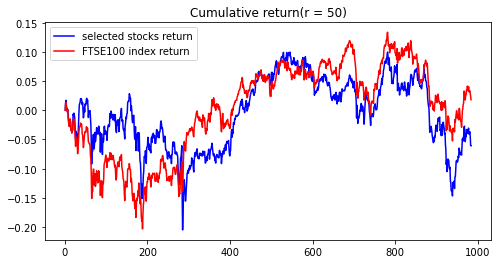

In [259]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
ax.plot(np.linspace(1,m,m), total_return_test, c='b',label="selected stocks return")
ax.plot(np.linspace(1,m,m), FTSE_return_test, c='r',label="FTSE100 index return")
ax.set_title("Cumulative return(r = 50)")
ax.legend()

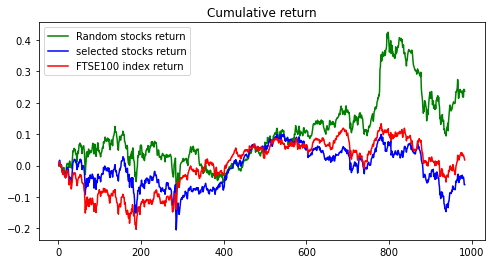

In [270]:
# random stocks

Stocks_random_train = []
Stocks_random_test = []


random_return_train = []
random_return_test = []

random_total_return_train = []
random_total_return_test = []

stocks_index = []

r =10

weight = [1/r] *10

#randomly select r stocks

i=0
while i < r:
    stock = np.floor(np.random.rand()*n).astype(int)
    if stock not in stocks_index:
         stocks_index.append(stock)
    else:
        i-=1
    i+=1

Stocks_random_train= V_train[:,stocks_index]
Stocks_random_test= V_test[:,stocks_index]
    

# compute return ratio in our selected stocks
for stocks in Stocks_random_train:
    c_return = np.true_divide(stocks - Stocks_random_train[0], Stocks_random_train[0])
    random_return_train.append(c_return)

# compute total cumulative return ratio  
for stocks in random_return_train:
    random_total_return_train.append(np.dot(stocks,weight))
    
for stocks in Stocks_random_test:
    c_return = np.true_divide(stocks - Stocks_random_test[0], Stocks_random_test[0])
    random_return_test.append(c_return)

for stocks in random_return_test:
    random_total_return_test.append(np.dot(stocks, weight))
    
    
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,4))
ax.plot(np.linspace(1,m,m), random_total_return_test, c='g',label="Random stocks return")
ax.plot(np.linspace(1,m,m), total_return_test, c='b',label="selected stocks return")
ax.plot(np.linspace(1,m,m), FTSE_return_test, c='r',label="FTSE100 index return")

ax.set_title("Cumulative return")
ax.legend()
    

# MLP

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

Text(0.5, 1.0, 'All Targets')

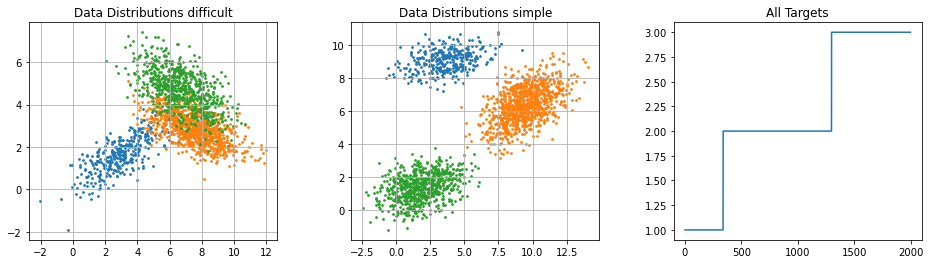

In [387]:
def genGaussianSamples(N,m,C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return (U@A.T + m)

NClasses = 3

priors

w = np.random.rand(NClasses)
w = w/np.sum(w)

N = 2000 # total data (Training = Test)
NPrior = np.floor(w * N).astype(int)

Scale = 10
Means = Scale*np.random.rand(NClasses, 2)
Means2 = Scale*np.random.rand(NClasses, 2)

from sklearn.datasets import make_spd_matrix

CovMatrices = np.zeros((NClasses,2,2))
CovMatrices2 = np.zeros((NClasses,2,2))

for j in range(NClasses):
    CovMatrices[j,:,:] = make_spd_matrix(2)
    CovMatrices2[j,:,:] = make_spd_matrix(2)
    
AllData = list()
AllData2 = list()

for j in range(NClasses):
    AllData.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))
    AllData2.append(genGaussianSamples(NPrior[j], Means2[j,:], CovMatrices2[j,:,:]))

    
X = AllData[0]
X_2 = AllData2[0]

y = np.ones((NPrior[0], 1))

y_2 = np.ones((NPrior[0], 1))

for j in range(NClasses -1):
    Xj = genGaussianSamples(NPrior[j+1],Means[j+1,:],CovMatrices[j+1,:,:])
    X = np.append(X, Xj, axis=0)
    yj = (j+2)*np.ones((NPrior[j+1],1))
    y = np.append(y,yj)
    
for j in range(NClasses -1):
    Xj = genGaussianSamples(NPrior[j+1],Means2[j+1,:],CovMatrices2[j+1,:,:])
    X_2 = np.append(X_2, Xj, axis=0)
    yj = (j+2)*np.ones((NPrior[j+1],1))
    y_2 = np.append(y_2,yj)    
    
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
plt.subplots_adjust(wspace = 0.3)
for j in range(NClasses):
    Xplt = AllData[j]
    ax[0].scatter(Xplt[:,0],Xplt[:,1],s=3)
    
for j in range(NClasses):
    Xplt = AllData2[j]
    ax[1].scatter(Xplt[:,0],Xplt[:,1],s=3)

ax[0].grid(True)
ax[0].set_title("Data Distributions difficult")
ax[1].grid(True)
ax[1].set_title("Data Distributions simple")
ax[2].plot(y)
ax[2].set_title("All Targets")

In [170]:
# confusion matrix

# N_train = X_train.shape[0]
# predicted_class_train = np.zeros((N_train,1))
# for j in range(N_train):
#     predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)
    
# from sklearn.metrics import confusion_matrix
# print("Confusion Matrix: ")
# print(confusion_matrix(y_train, predicted_class_train))

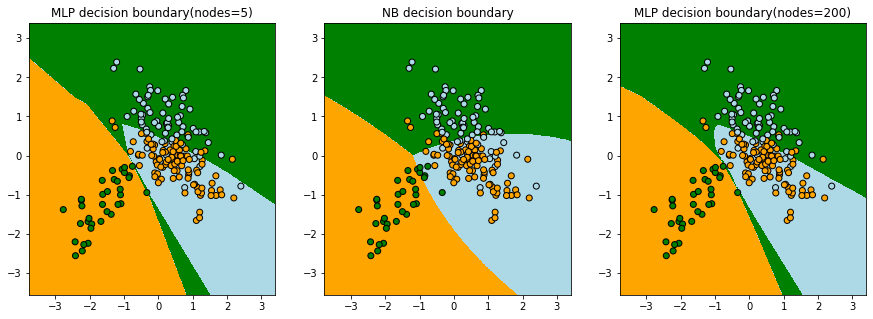

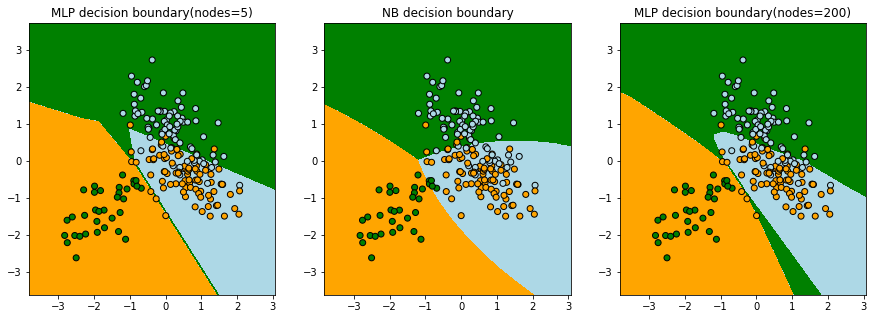

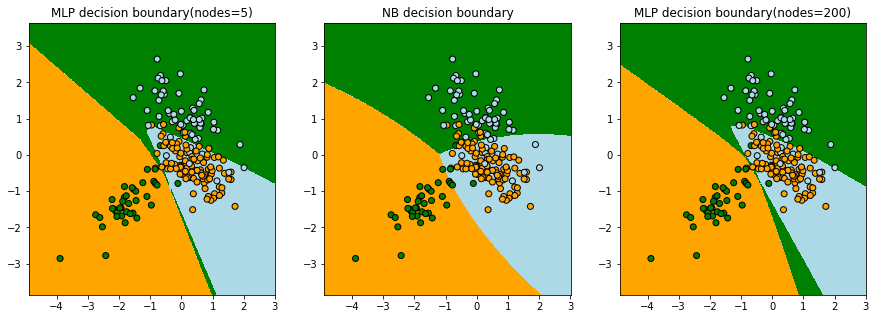

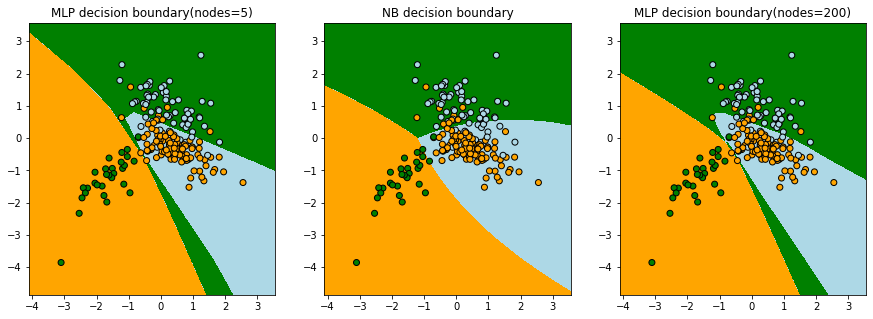

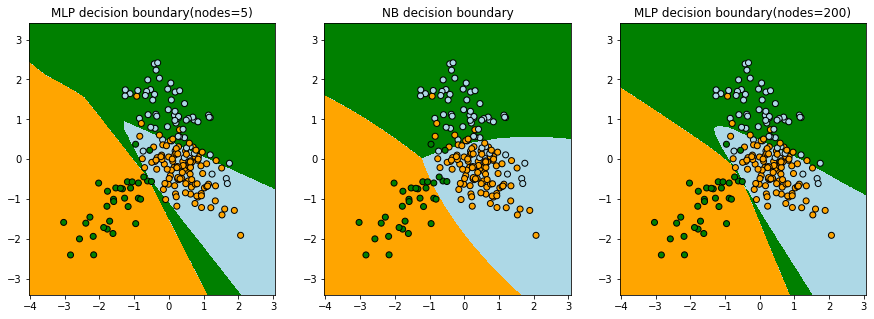

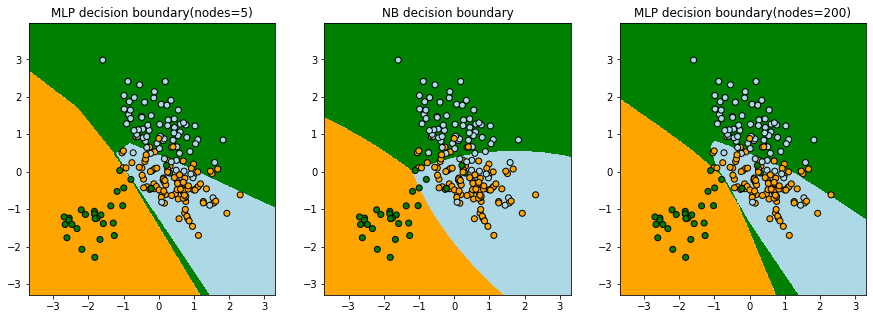

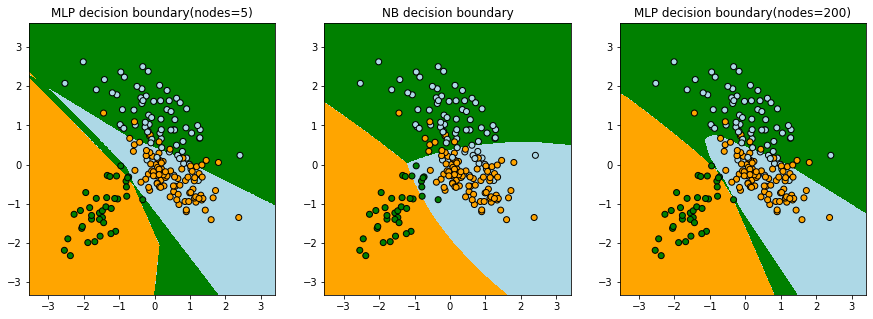

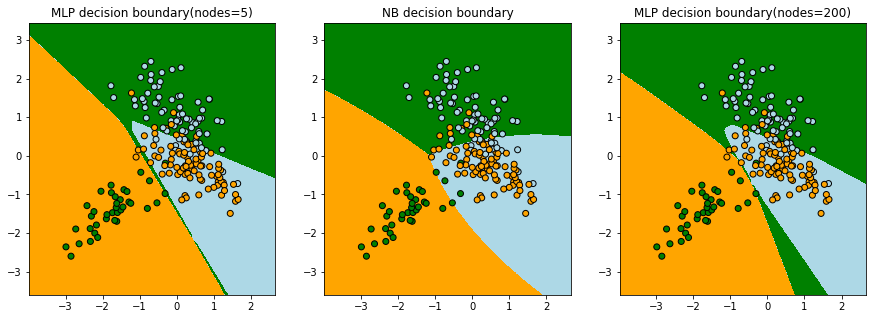

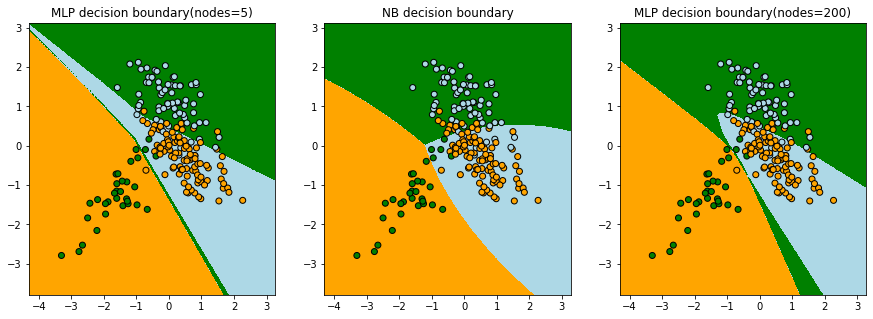

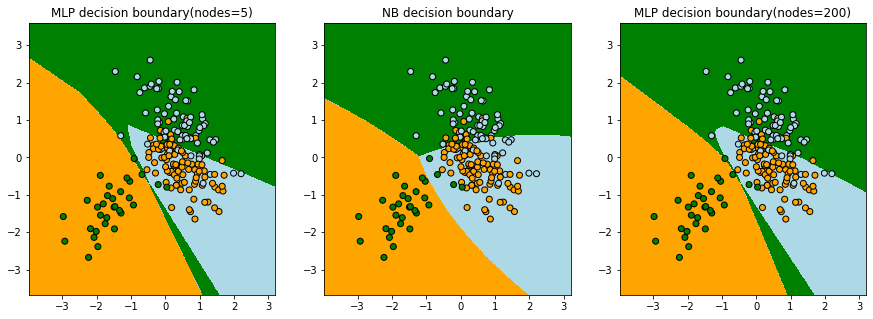

In [388]:
# difficult one 
from sklearn.model_selection import KFold
import matplotlib as mpl

# prepossess data. shuffle and scale 
X = preprocessing.scale(X)
np.random.seed(100)
np.random.shuffle(X) 
np.random.seed(100)
np.random.shuffle(y)

#mlp nb classifier scores on test and training data
mlp_train_scores = []
mlp_test_scores = []

mlp_train_scores_2 = []
mlp_test_scores_2 = []

nb_train_scores = []
nb_test_scores = []

#feature onehot encode 
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

#kfold validate
kf = KFold(n_splits=10)
for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    y_onehot_train, y_onehot_test = y_onehot[train_idx], y_onehot[test_idx]
    
    #MLP (simple)
    clf_mlp = MLPClassifier(hidden_layer_sizes=(5,),max_iter=1000)
    clf_mlp.fit(X_train, y_onehot_train)

    # predictions on training and test set
    y_pred_train_mlp = clf_mlp.predict(X_train)
    y_pred_test_mlp = clf_mlp.predict(X_test)
    
    #prediction accuracy on training and test set
    mlp_train_scores.append(accuracy_score(y_onehot_train, y_pred_train_mlp))
    mlp_test_scores.append(accuracy_score(y_onehot_test, y_pred_test_mlp))
    

    #MLP(complicated)
    clf_mlp_2 = MLPClassifier(hidden_layer_sizes=(200,),max_iter =1000)
    clf_mlp_2.fit(X_train, y_onehot_train)
    y_pred_train_mlp_2 = clf_mlp_2.predict(X_train)
    y_pred_test_mlp_2 = clf_mlp_2.predict(X_test)
    mlp_train_scores_2.append(accuracy_score(y_onehot_train, y_pred_train_mlp_2))
    mlp_test_scores_2.append(accuracy_score(y_onehot_test, y_pred_test_mlp_2))
    
    
    #NB
    clf_nb = GaussianNB()
    clf_nb.fit(X_train, y_train)
    
    y_pred_train_nb = clf_nb.predict(X_train)
    y_pred_test_nb = clf_nb.predict(X_test)
    
    #accuracy scores
    nb_train_scores.append(accuracy_score(y_train, y_pred_train_nb))
    nb_test_scores.append(accuracy_score(y_test, y_pred_test_nb))
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #Plotting decision regions
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) # generate points

    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))
    colors = ['green', 'orange', 'lightblue'] # colors for 3 classes
    colors_index = {1:'green', 2:'orange', 3:'lightblue'}

    
    Z_nb = clf_nb.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z1 = clf_mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z2 = clf_mlp_2.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # reduce y dimension for convenience of plotting mlp decision boundary
    Z_mlp = []
    for i in Z1:
        if all(i==[1,0,0]):
            Z_mlp.append(1)
        elif all(i==[0,1,0]):
            Z_mlp.append(2)
        else:
            Z_mlp.append(3)
            
    Z_mlp_2 = []
    for i in Z2:
        if all(i==[1,0,0]):
            Z_mlp_2.append(1)
        elif all(i==[0,1,0]):
            Z_mlp_2.append(2)
        else:
            Z_mlp_2.append(3)    
            
    Z_nb = Z_nb.reshape(xx.shape)    
        
    Z_mlp = np.array(Z_mlp)
    Z_mlp = Z_mlp.reshape(xx.shape)
    
    Z_mlp_2 = np.array(Z_mlp_2)
    Z_mlp_2 = Z_mlp_2.reshape(xx.shape)
    
    ax[0].contourf(xx, yy, Z_mlp, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors)
    ax[1].contourf(xx, yy, Z_nb, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors)
    ax[2].contourf(xx, yy, Z_mlp_2, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors)
#     ax[0].contourf(xx, yy, Z_mlp,cmap=plt.cm.Paired)
#     ax[1].contourf(xx, yy, Z_nb,cmap=plt.cm.Paired)
#     ax[2].contourf(xx, yy, Z_mlp_2,cmap=plt.cm.Paired)

    ax[0].set_title("MLP decision boundary(nodes=5)")
    ax[1].set_title("NB decision boundary")
    ax[2].set_title("MLP decision boundary(nodes=200)")
    
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=[colors_index.get(i) for i in y_test],edgecolor='black')
    ax[1].scatter(X_test[:, 0], X_test[:, 1], c=[colors_index.get(i) for i in y_test],edgecolor='black')
    ax[2].scatter(X_test[:, 0], X_test[:, 1], c=[colors_index.get(i) for i in y_test],edgecolor='black')

    plt.show()
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    

[]

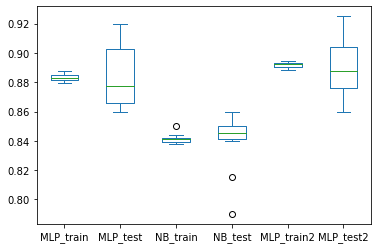

In [343]:
#plot boxplot
data = pd.DataFrame({"MLP_train":mlp_train_scores , "MLP_test": mlp_test_scores,"NB_train":nb_train_scores,"NB_test":nb_test_scores,"MLP_train2":mlp_train_scores_2,"MLP_test2":mlp_test_scores_2})
df = pd.DataFrame(data)
df.plot.box()

plt.plot()

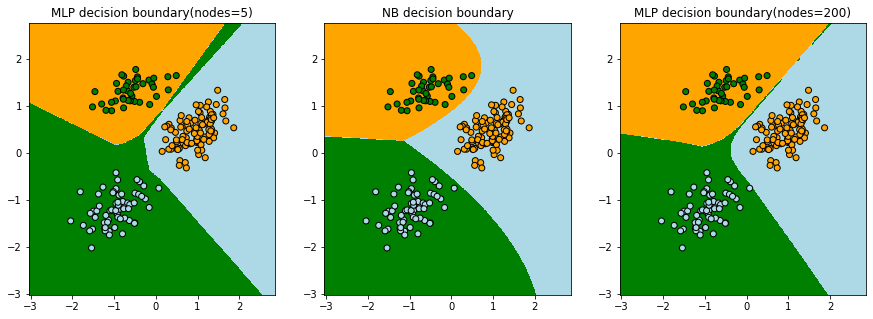

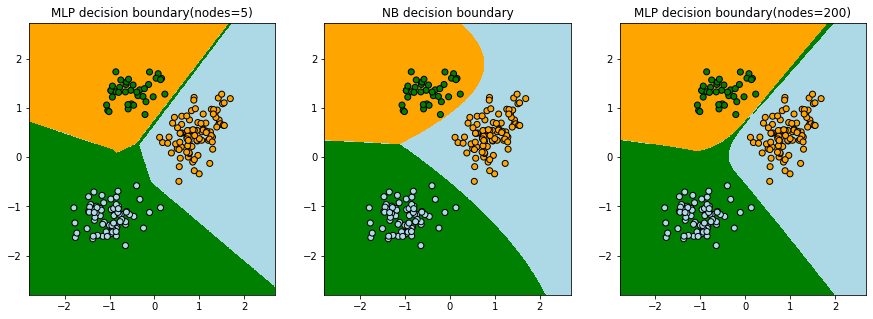

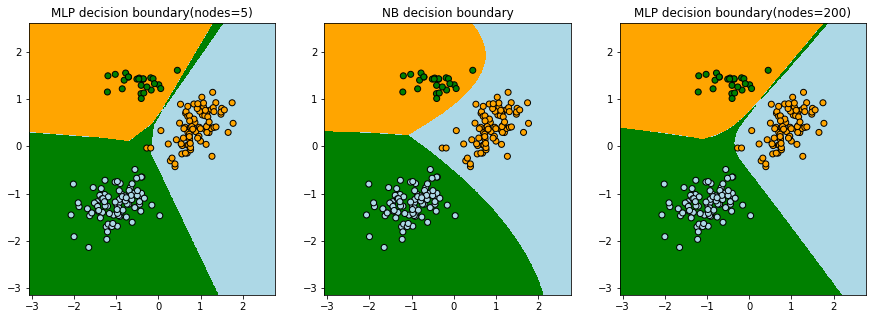

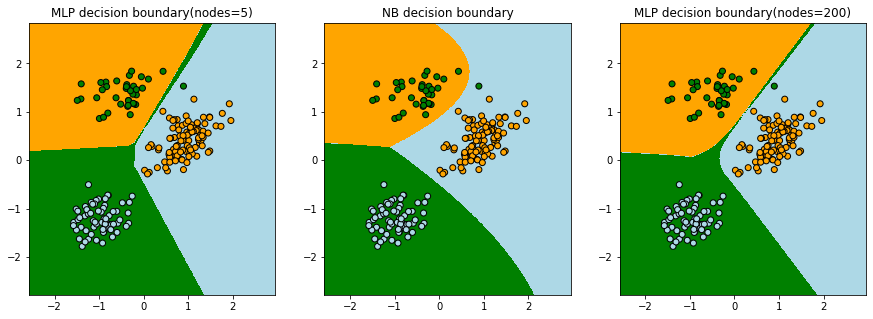

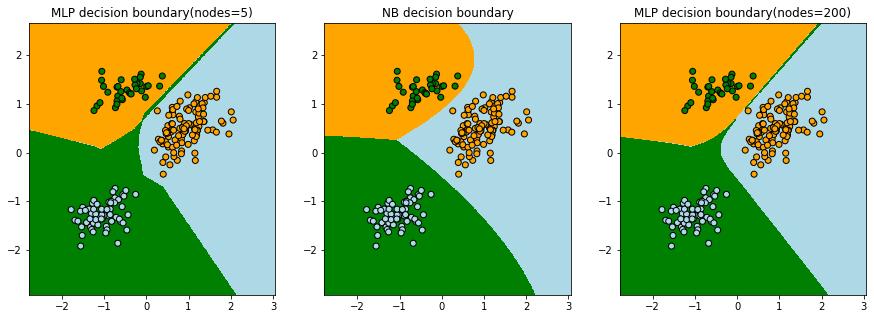

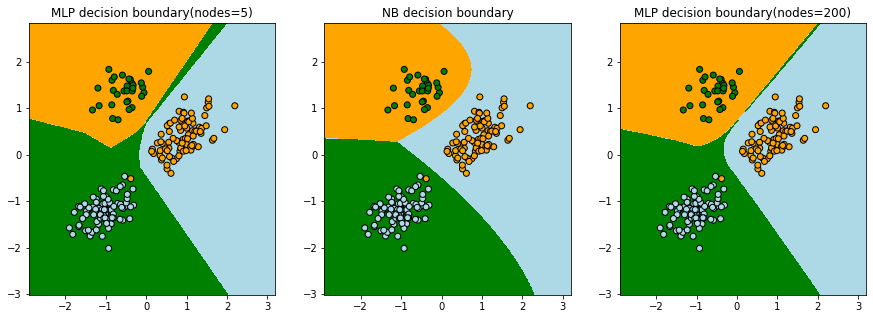

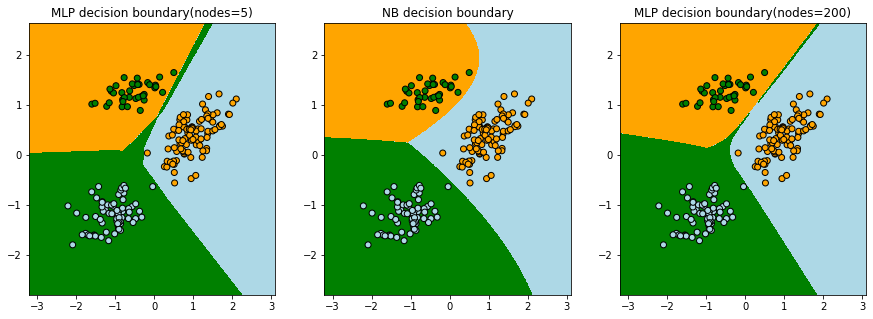

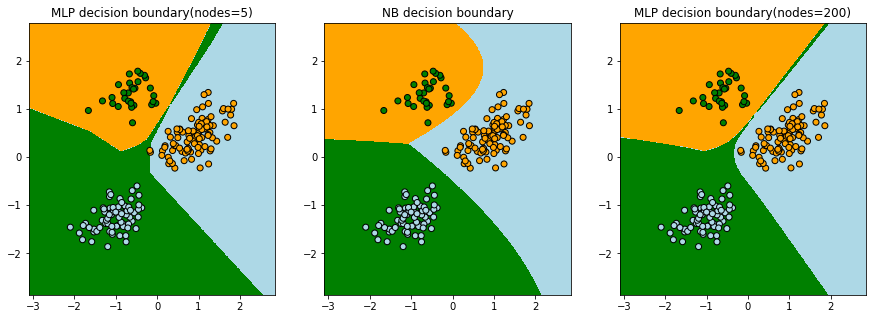

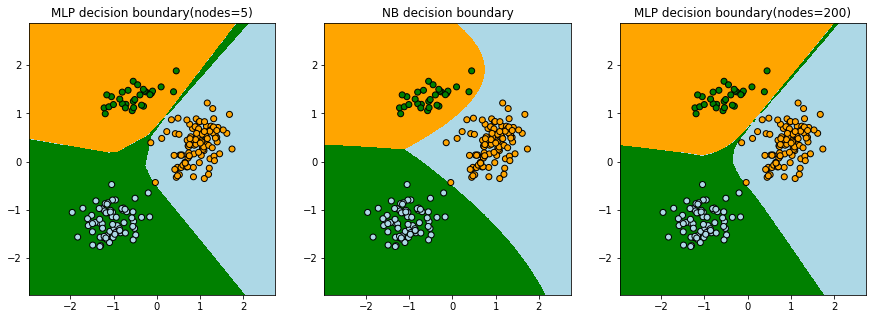

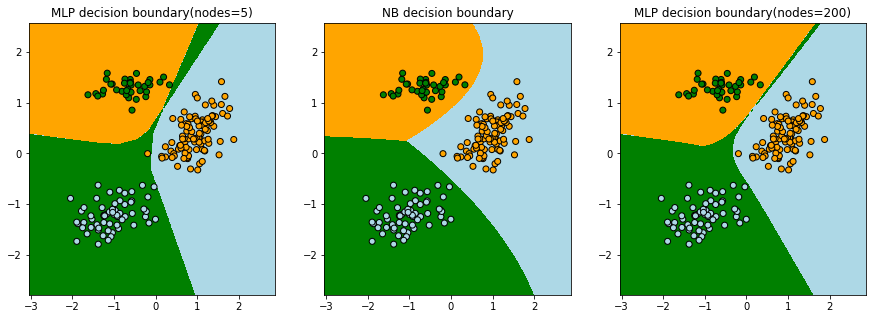

In [364]:
# easy one 
from sklearn.model_selection import KFold
import matplotlib as mpl

# prepossess data. shuffle and scale 
X_2 = preprocessing.scale(X_2)
np.random.seed(101)
np.random.shuffle(X_2) 
np.random.seed(101)
np.random.shuffle(y_2)

#mlp nb classifier scores on test and training data
mlp_train_scores = []
mlp_test_scores = []

mlp_train_scores_2 = []
mlp_test_scores_2 = []

nb_train_scores = []
nb_test_scores = []

#feature onehot encode 
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_2.reshape(-1, 1))

#kfold validate
kf = KFold(n_splits=10)
for train_idx, test_idx in kf.split(X_2, y_2):
    X_train, X_test = X_2[train_idx], X_2[test_idx]
    y_train, y_test = y_2[train_idx], y_2[test_idx]
    y_onehot_train, y_onehot_test = y_onehot[train_idx], y_onehot[test_idx]
    
    #MLP (simple)
    clf_mlp = MLPClassifier(hidden_layer_sizes=(5,),max_iter=1000)
    clf_mlp.fit(X_train, y_onehot_train)

    # predictions on training and test set
    y_pred_train_mlp = clf_mlp.predict(X_train)
    y_pred_test_mlp = clf_mlp.predict(X_test)
    
    #prediction accuracy on training and test set
    mlp_train_scores.append(accuracy_score(y_onehot_train, y_pred_train_mlp))
    mlp_test_scores.append(accuracy_score(y_onehot_test, y_pred_test_mlp))
    

    #MLP(complicated)
    clf_mlp_2 = MLPClassifier(hidden_layer_sizes=(200,),max_iter =1000)
    clf_mlp_2.fit(X_train, y_onehot_train)
    y_pred_train_mlp_2 = clf_mlp_2.predict(X_train)
    y_pred_test_mlp_2 = clf_mlp_2.predict(X_test)
    mlp_train_scores_2.append(accuracy_score(y_onehot_train, y_pred_train_mlp_2))
    mlp_test_scores_2.append(accuracy_score(y_onehot_test, y_pred_test_mlp_2))
    
    
    #NB
    clf_nb = GaussianNB()
    clf_nb.fit(X_train, y_train)
    
    y_pred_train_nb = clf_nb.predict(X_train)
    y_pred_test_nb = clf_nb.predict(X_test)
    
    #accuracy scores
    nb_train_scores.append(accuracy_score(y_train, y_pred_train_nb))
    nb_test_scores.append(accuracy_score(y_test, y_pred_test_nb))
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #Plotting decision regions
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) # generate points

    fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))
    colors = ['green', 'orange', 'lightblue'] # colors for 3 classes
    colors_index = {1:'green', 2:'orange', 3:'lightblue'}

    
    Z_nb = clf_nb.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z1 = clf_mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z2 = clf_mlp_2.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # reduce y dimension for convenience of plotting mlp decision boundary
    Z_mlp = []
    for i in Z1:
        if all(i==[1,0,0]):
            Z_mlp.append(1)
        elif all(i==[0,1,0]):
            Z_mlp.append(2)
        else:
            Z_mlp.append(3)
            
    Z_mlp_2 = []
    for i in Z2:
        if all(i==[1,0,0]):
            Z_mlp_2.append(1)
        elif all(i==[0,1,0]):
            Z_mlp_2.append(2)
        else:
            Z_mlp_2.append(3)    
            
    Z_nb = Z_nb.reshape(xx.shape)    
        
    Z_mlp = np.array(Z_mlp)
    Z_mlp = Z_mlp.reshape(xx.shape)
    
    Z_mlp_2 = np.array(Z_mlp_2)
    Z_mlp_2 = Z_mlp_2.reshape(xx.shape)
    
    ax[0].contourf(xx, yy, Z_mlp, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors)
    ax[1].contourf(xx, yy, Z_nb, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors)
    ax[2].contourf(xx, yy, Z_mlp_2, levels=[-0.5,0.5,1.5,2.5,3.5], colors=colors)
#     ax[0].contourf(xx, yy, Z_mlp,cmap=plt.cm.Paired)
#     ax[1].contourf(xx, yy, Z_nb,cmap=plt.cm.Paired)
#     ax[2].contourf(xx, yy, Z_mlp_2,cmap=plt.cm.Paired)

    ax[0].set_title("MLP decision boundary(nodes=5)")
    ax[1].set_title("NB decision boundary")
    ax[2].set_title("MLP decision boundary(nodes=200)")
    
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=[colors_index.get(i) for i in y_test],edgecolor='black')
    ax[1].scatter(X_test[:, 0], X_test[:, 1], c=[colors_index.get(i) for i in y_test],edgecolor='black')
    ax[2].scatter(X_test[:, 0], X_test[:, 1], c=[colors_index.get(i) for i in y_test],edgecolor='black')

    plt.show()
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    
    

[]

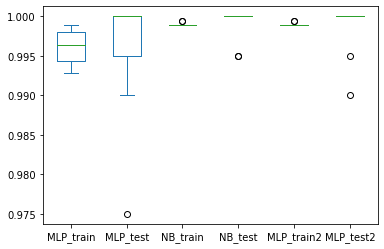

In [346]:
#plot boxplot
data = pd.DataFrame({"MLP_train":mlp_train_scores , "MLP_test": mlp_test_scores,"NB_train":nb_train_scores,"NB_test":nb_test_scores,"MLP_train2":mlp_train_scores_2,"MLP_test2":mlp_test_scores_2})
df = pd.DataFrame(data)
df.plot.box()

plt.plot()

/Users/john/.conda/envs/env_3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


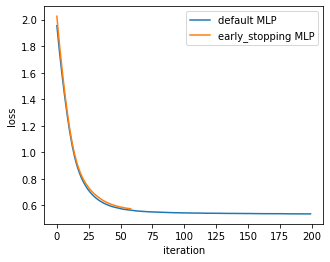

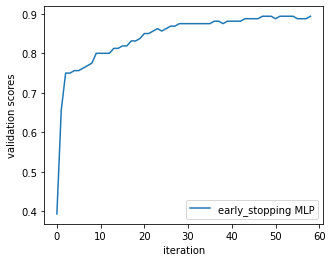

In [460]:
# early stopping
import matplotlib as mpl
from sklearn.model_selection import train_test_split

#kfold validate

X_3 = X
y_onehot_3 = y_onehot

X_train,X_test,y_train,y_test = train_test_split(X_3,y_onehot_3,test_size = 0.2)
    
#MLP (original)
clf_mlp_default = MLPClassifier()
clf_mlp_default.fit(X_train, y_train)

y_pred_train = clf_mlp_default.predict(X_train)
y_pred_test = clf_mlp_default.predict(X_test)



#MLP(modified)
clf_mlp_modified = MLPClassifier(early_stopping=True)
clf_mlp_modified.fit(X_train, y_train)

y_pred_train_2 = clf_mlp_modified.predict(X_train)
y_pred_test_2 = clf_mlp_modified.predict(X_test)



fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(clf_mlp_default.loss_curve_,label="default MLP")
ax.plot(clf_mlp_modified.loss_curve_,label="early_stopping MLP")
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.legend()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(clf_mlp_modified.validation_scores_,label="early_stopping MLP")
ax.set_xlabel("iteration")
ax.set_ylabel("validation scores")
ax.legend()



In [461]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train_2))

print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test_2))

0.890556597873671
0.8799249530956847
0.8675
0.87


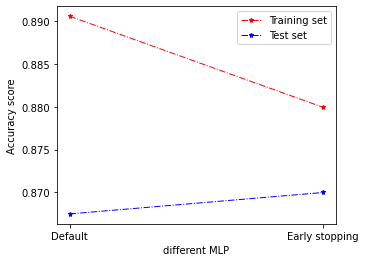

In [714]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(["Default","Early stopping"],[accuracy_score(y_train, y_pred_train),accuracy_score(y_train, y_pred_train_2)],'r-.*', lw=1, ms=5,label="Training set")
ax.plot(["Default","Early stopping"],[accuracy_score(y_test, y_pred_test),accuracy_score(y_test, y_pred_test_2)],'b-.*', lw=1, ms=5,label="Test set")
ax.set_ylabel("Accuracy score")
ax.set_xlabel("different MLP")
ax.legend()

/Users/john/.conda/envs/env_3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8868042526579112
0.8825
0.8830519074421513
0.8775
0.8861788617886179
0.885
0.884302689180738
0.8825
0.8861788617886179
0.8825
0.8849280800500313
0.88
0.8874296435272045
0.8825
0.8849280800500313
0.8825
0.8792995622263915
0.8875
0.8868042526579112
0.885


/Users/john/.conda/envs/env_3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8855534709193246
0.88
0.8298936835522202
0.8025


/Users/john/.conda/envs/env_3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


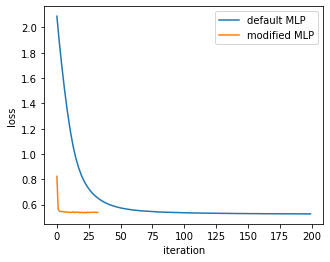

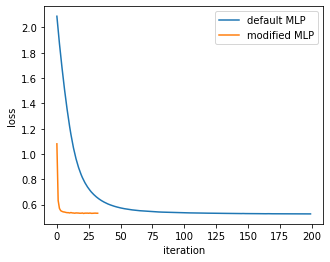

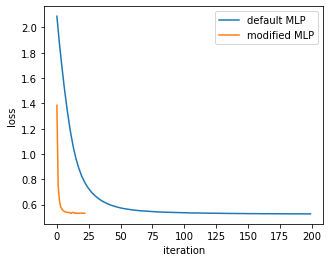

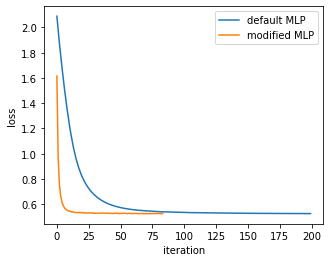

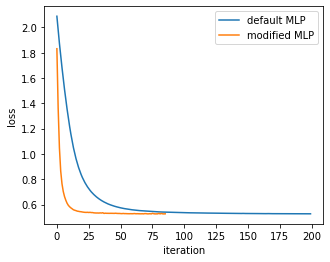

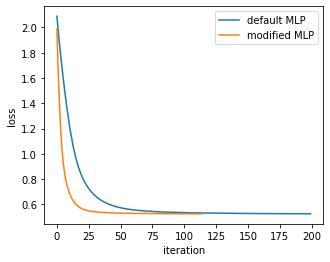

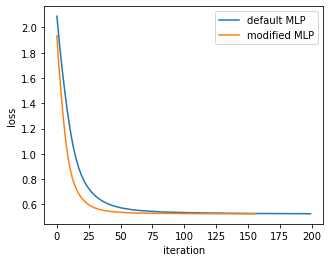

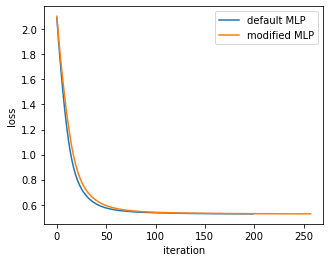

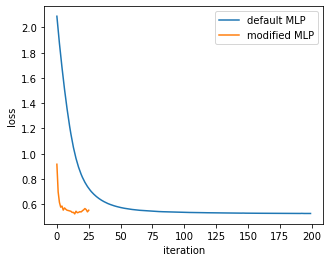

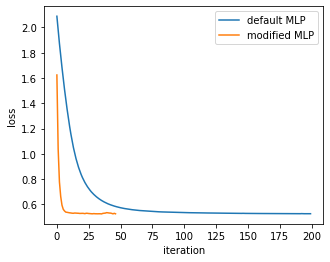

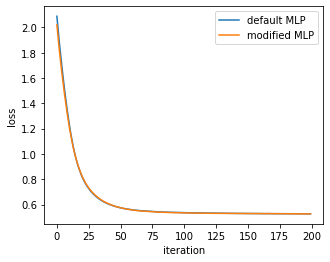

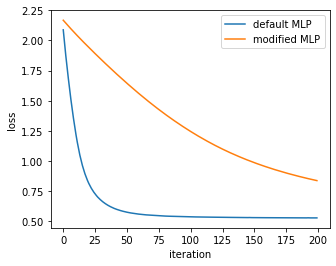

In [721]:
# difficult one 
from sklearn.model_selection import KFold
import matplotlib as mpl
from sklearn.model_selection import train_test_split

scores_train = []
scores_test = []
scores_train_2 = []
scores_test_2 = []

X_4 = X
y_onehot_4 = y_onehot

X_train,X_test,y_train,y_test = train_test_split(X_4,y_onehot_4,test_size = 0.2)
    
#MLP (original)
clf_mlp_default = MLPClassifier()
clf_mlp_default.fit(X_train, y_train)

y_pred_train = clf_mlp_default.predict(X_train)
y_pred_test = clf_mlp_default.predict(X_test)

batch_size_selected = [1,4,8,16,32,64,128,256]
learning_rate_selected = [0.1,0.01,0.001,0.0001]
# batch size
for i in batch_size_selected:
# initial learning rate
#     for j in [0.1,0.01,0.001,0.0001]: 
    #MLP(modified)
    clf_mlp_modified = MLPClassifier(batch_size = i,max_iter = 1000)
    clf_mlp_modified.fit(X_train, y_train)

    y_pred_train_2 = clf_mlp_modified.predict(X_train)
    y_pred_test_2 = clf_mlp_modified.predict(X_test)


    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
    ax.plot(clf_mlp_default.loss_curve_,label="default MLP")
    ax.plot(clf_mlp_modified.loss_curve_,label="modified MLP")
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")
    ax.legend()
    
    scores_train.append(accuracy_score(y_train, y_pred_train_2))
    scores_test.append(accuracy_score(y_test, y_pred_test_2))

    print(accuracy_score(y_train, y_pred_train_2))
    print(accuracy_score(y_test, y_pred_test_2))
    
    
for i in learning_rate_selected:
    
    clf_mlp_modified = MLPClassifier(learning_rate_init=i)
    clf_mlp_modified.fit(X_train, y_train)

    y_pred_train_2 = clf_mlp_modified.predict(X_train)
    y_pred_test_2 = clf_mlp_modified.predict(X_test)


    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
    ax.plot(clf_mlp_default.loss_curve_,label="default MLP")
    ax.plot(clf_mlp_modified.loss_curve_,label="modified MLP")
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")
    ax.legend()

    scores_train_2.append(accuracy_score(y_train, y_pred_train_2))
    scores_test_2.append(accuracy_score(y_test, y_pred_test_2))

    print(accuracy_score(y_train, y_pred_train_2))
    print(accuracy_score(y_test, y_pred_test_2))



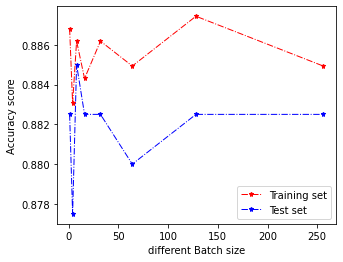

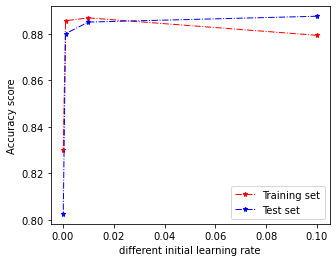

In [722]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(batch_size_selected,scores_train,'r-.*', lw=1, ms=5,label="Training set")
ax.plot(batch_size_selected,scores_test,'b-.*', lw=1, ms=5,label="Test set")
ax.set_ylabel("Accuracy score")
ax.set_xlabel("different Batch size")
ax.legend()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
# ax.set_xticks(learning_rate_selected)
ax.plot(learning_rate_selected,scores_train_2,'r-.*', lw=1, ms=5,label="Training set")
ax.plot(learning_rate_selected,scores_test_2,'b-.*', lw=1, ms=5,label="Test set")
ax.set_ylabel("Accuracy score")
ax.set_xlabel("different initial learning rate")
ax.legend()


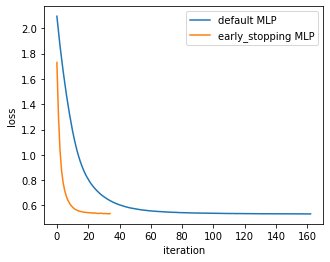

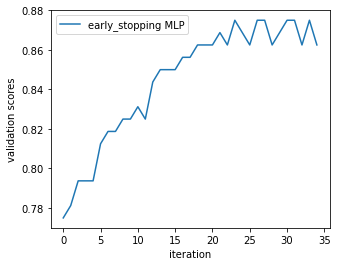

In [752]:
# early stopping
import matplotlib as mpl
from sklearn.model_selection import train_test_split

#kfold validate

X_3 = X
y_onehot_3 = y_onehot

X_train,X_test,y_train,y_test = train_test_split(X_3,y_onehot_3,test_size = 0.2)
    
#MLP (original)
clf_mlp_default = MLPClassifier()
clf_mlp_default.fit(X_train, y_train)

y_pred_train = clf_mlp_default.predict(X_train)
y_pred_test = clf_mlp_default.predict(X_test)



#MLP(modified)
clf_mlp_modified = MLPClassifier(early_stopping=True,learning_rate_init = 0.001,batch_size = 32)
clf_mlp_modified.fit(X_train, y_train)

y_pred_train_2 = clf_mlp_modified.predict(X_train)
y_pred_test_2 = clf_mlp_modified.predict(X_test)



fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(clf_mlp_default.loss_curve_,label="default MLP")
ax.plot(clf_mlp_modified.loss_curve_,label="early_stopping MLP")
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.legend()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(clf_mlp_modified.validation_scores_,label="early_stopping MLP")
ax.set_xlabel("iteration")
ax.set_ylabel("validation scores")
ax.legend()



In [753]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train_2))

print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test_2))

0.8805503439649781
0.8861788617886179
0.88
0.89


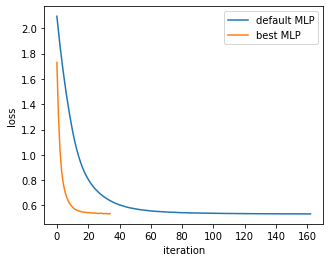

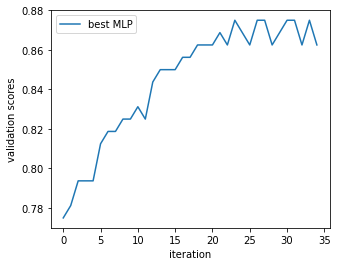

In [754]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(clf_mlp_default.loss_curve_,label="default MLP")
ax.plot(clf_mlp_modified.loss_curve_,label="best MLP")
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.legend()

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
ax.plot(clf_mlp_modified.validation_scores_,label="best MLP")
ax.set_xlabel("iteration")
ax.set_ylabel("validation scores")
ax.legend()